# 카카오 코딩테스트 - 자카드 유사도

# 문제

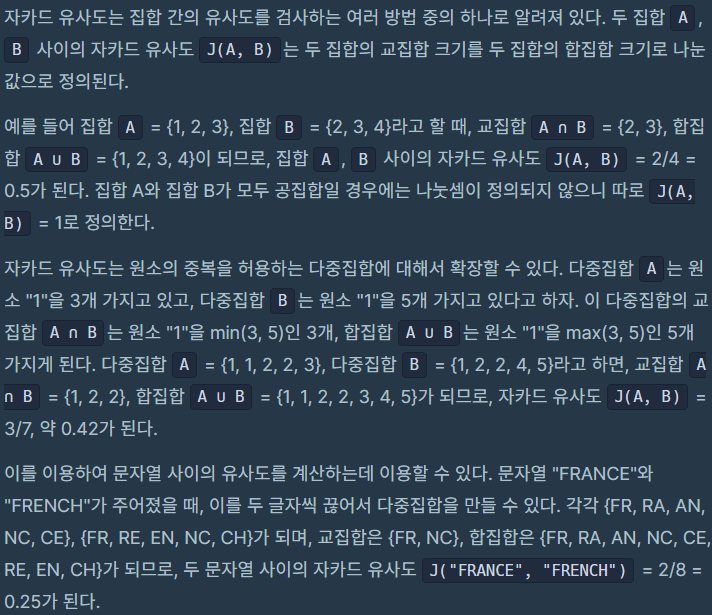

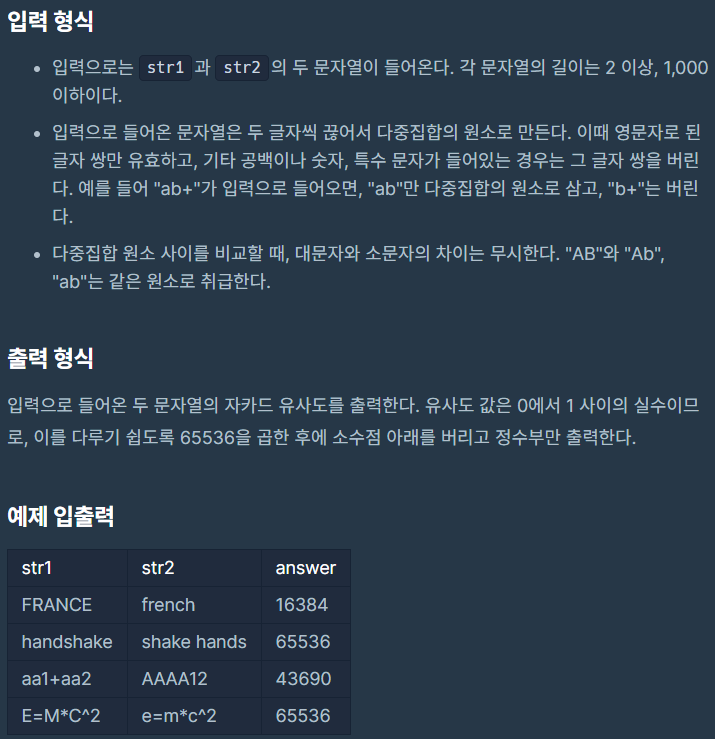

### 내 풀이

제시된 조건을 순서대로 찾아나갔는데

다른사람들의 풀이를 보고 아쉬움이 많은 코드가 되버렸다.

In [ ]:
#자카드 유사도 > 교집합 수/ 합집합 수

#원소의 중복을 혀용하는 다중집합

from itertools import combinations
def solution(str1, str2):
    answer = 0
    
    lst_str1 =[]
    lst_str2 =[]
    
    # 연속된 두 원소가 둘다 알파벳이면 리스트에 추가
    
    for idx in range(len(str1)-1):
        str = str1[idx]+str1[idx+1] 
        if str.isalpha():
            lst_str1.append(str.lower())
            
    for idx in range(len(str2)-1):
        str = str2[idx]+str2[idx+1] 
        if str.isalpha():
            lst_str2.append(str.lower())
    
    str_dict1 = {}
    str_dict2 = {}
    
    set_lst_str1 = list(set(lst_str1))
    set_lst_str2 = list(set(lst_str2))
    
    
    # 원소마다 갯수 세기
    for str in set_lst_str1:
        str_dict1[str] = lst_str1.count(str)
    for str in set_lst_str2:
        str_dict2[str] = lst_str2.count(str)
    
    n12 = 0
    u12 = 0
    
    
    # 교집합 합집합의 수
    # 1번 중 2번에 있으면 min을 교집합에 더해주고, max를 합집합에 더해줌
    for s in str_dict1.keys():
        if s in str_dict2.keys():
            n12 += min(str_dict1[s],str_dict2[s])
            u12 += max(str_dict1[s],str_dict2[s])
        else:
            u12 += str_dict1[s]
    
    # 2번중 1번에 없는걸 합집합에 더해줌
    for s in str_dict2.keys():
        if s not in str_dict1.keys():
            u12 += str_dict2[s]
    
    
    # 합집합이 0이면 답1 아니면 교집합/합집합 수
    if u12 == 0:
        answer = 1
    else:
        answer = n12/u12
    return int(answer * 65536)

### 이렇게 풀고 싶은 코드

list 내에서 for 문과 if 문, isalpha도 아름답게 사용했고, 교집합 합집합 구할때도 대단하다...

여기서 배워야할 건 list.lower(), list.count(a), 집합의 교집합 합집합(항상 까먹음)

In [ ]:
def solution(str1, str2):
    set1 = [str1[i:i+2].lower() for i in range(len(str1) - 1) if str1[i:i+2].lower().isalpha()]
    set2 = [str2[i:i+2].lower() for i in range(len(str2) - 1) if str2[i:i+2].lower().isalpha()]

    uu = sum([min(set1.count(u), set2.count(u)) for u in list(set(set1) & set(set2))])
    nn = sum([max(set1.count(n), set2.count(n)) for n in list(set(set1) | set(set2))])

    if nn == 0 and uu == 0:
        return 65536
    return int(float(uu)/float(nn) * 65536)